# Colliding Plane Waves Metric
##  Geoff Cope
##  University of Utah
## 𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 22, 2021

Where this metric is taken from:  "Interacting Gravitational, Electromagnetic, Neutrino and Other Waves" by Anzhong Wang page 44.  Christoffel Symbols are calculated on page 55.  This metric also appears in "Colliding Plane Waves In General Relativity" by Griffiths page 20 Equation 4.13

http://213.230.96.51:8090/files/ebooks/Fizika/Griffiths%20J.B.%20Colliding%20plane%20waves%20in%20general%20relativity%20(OUP,%201991)(ISBN%200198532091)(254s)%20PGr%20.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,y,du,dv,dx,dy = symbols('u v x y du dv dx dy' , positive = True, real = True)

In [4]:
L = Function('L')(u,v)
L

In [5]:
U = Function('U')(u,v)
U

In [6]:
V = Function('V')(u,v)
V

In [7]:
W = Function('W')(u,v)
W

In [11]:
#  will back substitute sinh for f 
f = Function('f')(W)
f

In [29]:
#  will back substitute sinh for f 
ftosinh = Eq(f,sinh(W))
ftosinh 

In [13]:
#  will back substitute cosh for h 
h = Function('h')(W)
h

In [30]:
#  will back substitute cosh for h 
htocosh = Eq(h,cosh(W))
htocosh

In [8]:
variables = Matrix( [u,v,x,y] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [9]:
differentials = Matrix( [du,dv,dx,dy] ) 
differentials

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [14]:
lineElement = expand(2*exp(-L)*du*dv - exp(-U)* ( exp(V) * h * dx**2 - 2*f*dx*dy + exp(-V)*h* dy**2))
lineElement 

In [15]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -L(u, v)                                                                 ⎤
⎢    0      ℯ                        0                                0               ⎥
⎢                                                                                     ⎥
⎢ -L(u, v)                                                                            ⎥
⎢ℯ              0                    0                                0               ⎥
⎢                                                                                     ⎥
⎢                                   -U(u, v)  V(u, v)                   -U(u, v)      ⎥
⎢    0          0      -h(W(u, v))⋅ℯ        ⋅ℯ              f(W(u, v))⋅ℯ              ⎥
⎢                                                                                     ⎥
⎢                                       -U(u, v)                    -U(u, v)  -V(u, v)⎥
⎣    0          0           f(W(u, v))⋅ℯ               -h(W(u, v))⋅ℯ        ⋅ℯ        ⎦

In [16]:
import sympy

In [17]:
m = sympy.Array(g)
m

⎡            -L(u, v)                                                                 ⎤
⎢    0      ℯ                        0                                0               ⎥
⎢                                                                                     ⎥
⎢ -L(u, v)                                                                            ⎥
⎢ℯ              0                    0                                0               ⎥
⎢                                                                                     ⎥
⎢                                   -U(u, v)  V(u, v)                   -U(u, v)      ⎥
⎢    0          0      -h(W(u, v))⋅ℯ        ⋅ℯ              f(W(u, v))⋅ℯ              ⎥
⎢                                                                                     ⎥
⎢                                       -U(u, v)                    -U(u, v)  -V(u, v)⎥
⎣    0          0           f(W(u, v))⋅ℯ               -h(W(u, v))⋅ℯ        ⋅ℯ        ⎦

In [18]:
from einsteinpy.symbolic import *

In [19]:
syms = sympy.symbols("u v x y" , positive = True, real = True)
u,v,x,y = syms

In [20]:
metric = MetricTensor(m,syms)

In [21]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡ ∂                                                                                        
⎢⎢-──(L(u, v))  0                                                                           
⎢⎢ ∂u                                                                                       
⎢⎢                                                                                          
⎢⎢     0        0                                                                           
⎢⎢                                                                    

In [22]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                       4          ∂        
⎢                                                                      f (W(u, v))⋅──(L(u, v
⎢                                                                                  ∂u       
⎢                                                                                           
⎢                                                                      ─────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

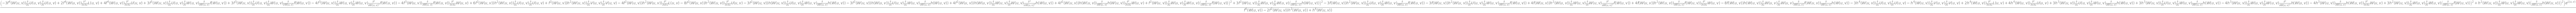

In [23]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [26]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [24]:
# rm1 = RiemannCurvatureTensor.from_christoffels(ch)
# rm1.tensor()

In [25]:
# weyl = WeylTensor.from_metric(metric)
# weyl.tensor()

In [27]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                       4          ∂        
⎢                                                                      f (W(u, v))⋅──(L(u, v
⎢                                                                                  ∂u       
⎢                                                                                           
⎢                                                                      ─────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [28]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                               2                           
⎢                                       4          ⎛∂          ⎞                            
⎢                                      f (W(u, v))⋅⎜──(U(u, v))⎟                  2         
⎢ 4          ∂           ∂                         ⎝∂u         ⎠     4           ∂          
⎢f (W(u, v))⋅──(L(u, v))⋅──(U(u, v)) - ────────────────────────── + f (W(u, v))⋅───(U(u, v))
⎢            ∂u          ∂u                        2                              2         
⎢                                                                               ∂u          
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

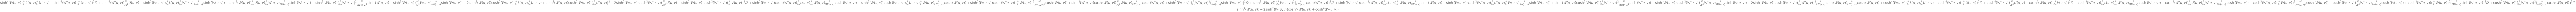

In [36]:
ricciSimplified[0,0].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs)

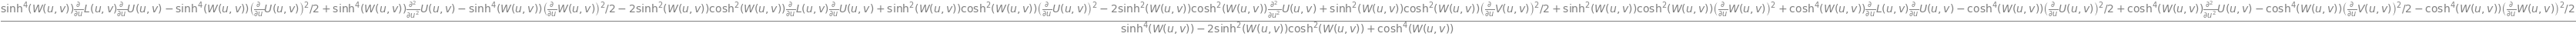

In [37]:
ricciSimplified[0,0].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs).doit()

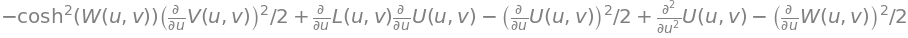

In [38]:
ricci00 = ricciSimplified[0,0].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs).doit().simplify()
ricci00

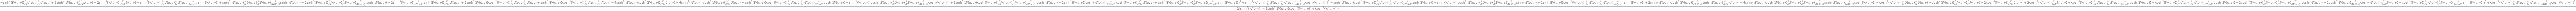

In [41]:
ricciSimplified[0,1].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs)

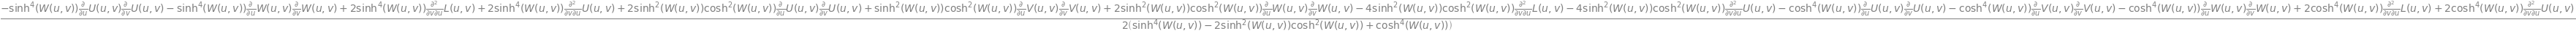

In [42]:
ricciSimplified[0,1].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs).doit()

In [43]:
ricciSimplified[0,1].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs).doit().simplify()

NotImplementedError: Improve MV Derivative support in collect

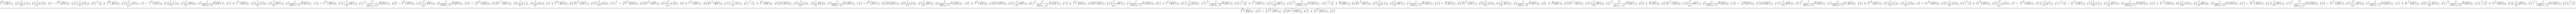

In [44]:
ricciSimplified[1,1]

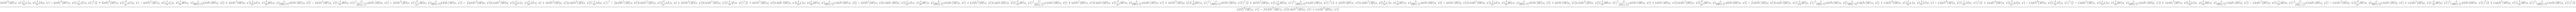

In [45]:
ricciSimplified[1,1].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs)

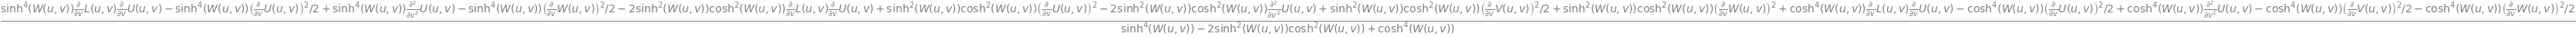

In [46]:
ricciSimplified[1,1].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs).doit()

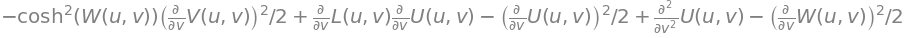

In [47]:
ricci11 = ricciSimplified[1,1].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs).doit().simplify()
ricci11 

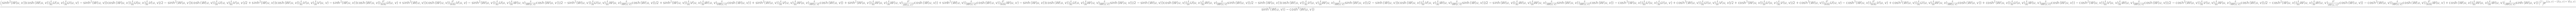

In [49]:
ricciSimplified[2,2].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs)

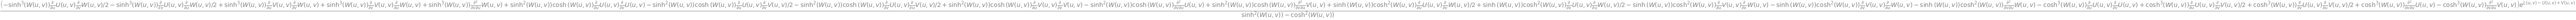

In [50]:
ricciSimplified[2,2].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs).doit()

In [51]:
ricciSimplified[2,2].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs).doit().simplify()

NotImplementedError: Improve MV Derivative support in collect

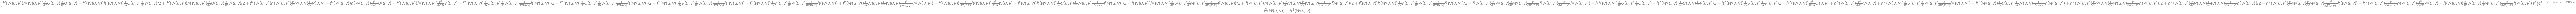

In [52]:
ricciSimplified[3,3]

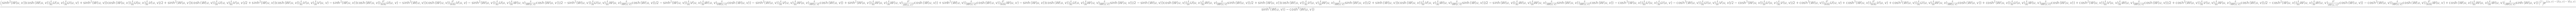

In [53]:
ricciSimplified[3,3].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs)

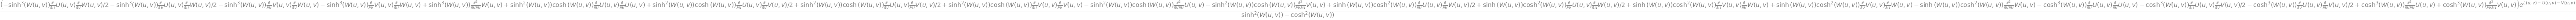

In [54]:
ricciSimplified[3,3].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs).doit()

In [55]:
ricciSimplified[3,3].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs).doit().simplify()

NotImplementedError: Improve MV Derivative support in collect

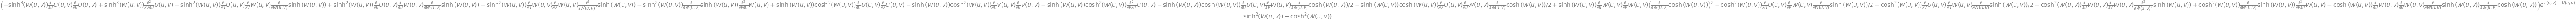

In [58]:
ricciSimplified[2,3].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs)

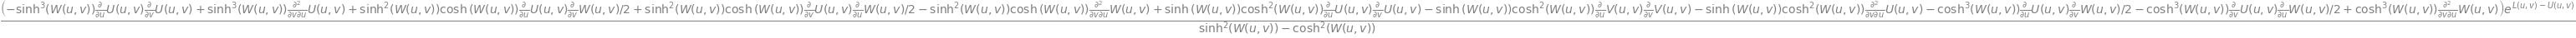

In [57]:
ricciSimplified[2,3].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs).doit()

In [59]:
ricciSimplified[2,3].subs(ftosinh.lhs,ftosinh.rhs).subs(htocosh.lhs,htocosh.rhs).doit().simplify()

NotImplementedError: Improve MV Derivative support in collect